# Part I (75 points):  Apply Machine Learning approaches on MNIST Handwritten Digit Dataset

Step 1 (1 points). Prepare the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.decomposition import PCA

In [3]:
mnist = tf.keras.datasets.mnist
(X_train_val, y_train_val) ,(X_test, y_test) = mnist.load_data()   #Download the data set with Tensorflow

In [4]:
#Separate a number of validation sets from a test set
X_valid = []
y_valid = []
X_train = []
y_train = []
i = 1
for x,y in zip(X_train_val, y_train_val):
  if i%12 ==0:
    X_valid.append(x)
    y_valid.append(y)
  else:
    X_train.append(x)
    y_train.append(y)
  i = i+1
X_valid = np.array(X_valid, np.float32)
y_valid = np.array(y_valid)
X_train = np.array(X_train, np.float32)
y_train = np.array(y_train)
X_test = np.array(X_test, np.float32)

In [5]:
#print
print("X_train.shape: ", X_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (55000,)
y_valid.shape:  (5000,)
y_test.shape:  (10000,)


Step 2 (2 points). Visualize the digit images

In [6]:
#Randomly generate 9 non-repeating numbers and visualize them
nums = set()
while len(nums) < 9:
  nums.add(random.randint(0,54999))
nums = list(nums)

Print 6176 figure
Print 4803 figure
Print 9900 figure
Print 44749 figure
Print 42254 figure
Print 40783 figure
Print 13840 figure
Print 11663 figure
Print 41178 figure


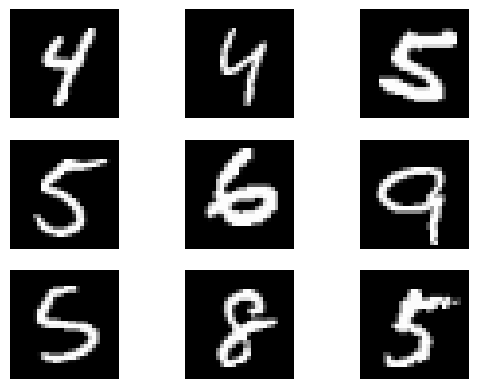

In [7]:
r,c=3,3
w,h=28,28
batch=r*c
fig,axs=plt.subplots(r,c)
for i in nums:
  print("Print %d figure"%i)
  cur=X_train[i:i+batch]
  cnt=0
  for j in range(r):
    for k in range(c):
      axs[j,k].imshow(cur[cnt].reshape(w,h),cmap='gray')
      axs[j,k].axis('off')
      cnt+=1

Step 3 (2 points). Examine the frequency of classes in train, validation, and test set.

In [8]:
#Count the number of training set, validation set and test set in each category
y_train_classnum = [0,0,0,0,0,0,0,0,0,0]
y_valid_classnum = [0,0,0,0,0,0,0,0,0,0]
y_test_classnum = [0,0,0,0,0,0,0,0,0,0]
for label in y_train:
  y_train_classnum[label] = y_train_classnum[label]+1
for label in y_valid:
  y_valid_classnum[label] = y_valid_classnum[label]+1
for label in y_test:
  y_test_classnum[label] = y_test_classnum[label]+1
print(y_train_classnum)
print(y_valid_classnum)
print(y_test_classnum)

[5406, 6202, 5510, 5579, 5362, 4962, 5439, 5743, 5334, 5463]
[517, 540, 448, 552, 480, 459, 479, 522, 517, 486]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


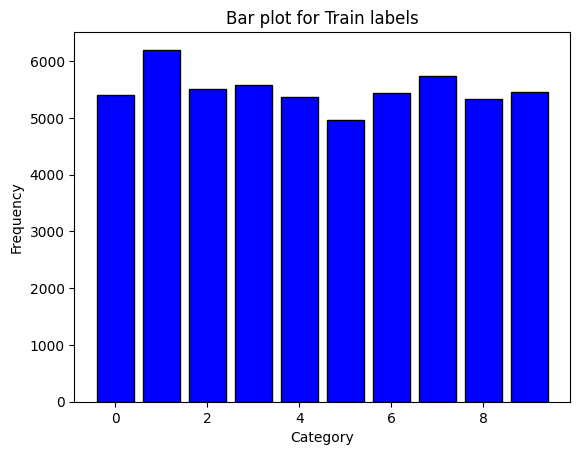

In [9]:
#Visualization of the number of classes in the training set
fig = plt.figure()
x = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x,y_train_classnum,
        color="blue",
        edgecolor= 'black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Train labels')
plt.show()

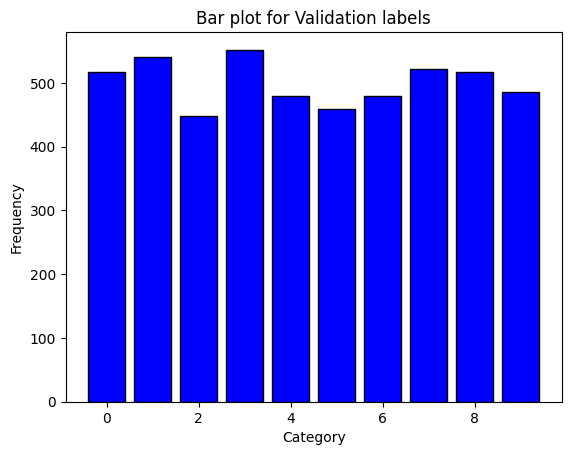

In [10]:
# validation set
fig = plt.figure()
x = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x,y_valid_classnum,
        color="blue",
        edgecolor= 'black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Validation labels')
plt.show()

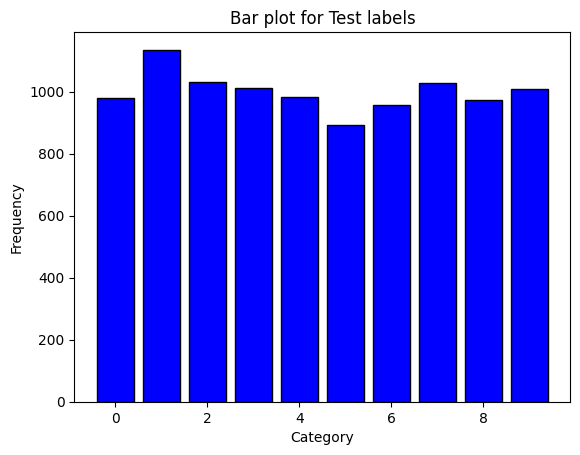

In [11]:
#test set
fig = plt.figure()
x = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x,y_test_classnum,
        color="blue",
        edgecolor= 'black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Test labels')
plt.show()

Task 4: (20 points) Build several classification models.  You need to fit each machine

Task 4.1: Proper feature scaling (Standardization  or Min-Max normalization) on the training, validation and test set

In [12]:
X_train , X_valid , X_test = X_train.reshape([-1,28*28]) , X_valid.reshape([-1,28*28]) , X_test.reshape([-1,28*28])
x_train = preprocessing.scale(X_train)  #Standardization
x_valid = preprocessing.scale(X_valid)
x_test = preprocessing.scale(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probab

Task 4.2: Report running time of model training for all methods above.

Task 4.3: Calculate the overall accuracy of the predictions over training set, validation set and test set.

In [13]:
#SoftMax Regression
w = tf.Variable(tf.cast(np.random.randn(784,10)*0.001,tf.float32),name="weight")
b = tf.Variable(tf.cast(np.random.randn(10),tf.float32),name="bias")
learning_rate = 0.1
step = 1000
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)
def logistic_f(x):  #Define logistic regression equations
  z = tf.matmul(x,w)+b
  y = tf.nn.softmax(z)
  return y
def loss_f(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth=10)
  term1 = -y_true*tf.math.log(y_pred)
  loss = tf.reduce_mean(tf.reduce_sum(term1,1))
  return loss
optimizer = tf.optimizers.SGD(learning_rate) #Define the stochastic gradient descent optimizer
def run_optimizer(x,y):
    with tf.GradientTape() as g:
        pred = logistic_f(x)
        loss = loss_f(pred,y)
    gradients = g.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients,[w,b]))
def accuracy(y_pred,y_true):  #Accuracy
    y_pred = tf.argmax(y_pred,1)
    y_true = tf.cast(y_true, y_pred.dtype)
    correct = tf.equal(y_pred, y_true)
    correct = tf.cast(correct, tf.float32)
    accuracy = tf.reduce_mean(correct)
    return accuracy
#The iterative execution optimizer calculates w, b, and outputs the execution time and accuracy of the training set
all_loss = []
all_acc = []
start = time.time()
for i, (batch_x, batch_y) in enumerate(train_data.take(step), 1):
  run_optimizer(batch_x, batch_y)
  if i % 50 == 0:
    pred = logistic_f(batch_x)
    loss = loss_f(pred, batch_y)
    all_loss.append(loss)
    acc = accuracy(pred, batch_y)
    all_acc.append(acc)
    print("step: %i, loss: %f, accuracy: %f" % (i, loss, acc))
end = time.time()
print("Training time:{}".format(end-start))  #Task 4.2

step: 50, loss: 0.412384, accuracy: 0.894531
step: 100, loss: 0.377516, accuracy: 0.902344
step: 150, loss: 0.334619, accuracy: 0.894531
step: 200, loss: 0.198433, accuracy: 0.941406
step: 250, loss: 0.336229, accuracy: 0.910156
step: 300, loss: 0.338882, accuracy: 0.917969
step: 350, loss: 0.237356, accuracy: 0.937500
step: 400, loss: 0.222663, accuracy: 0.937500
step: 450, loss: 0.162584, accuracy: 0.960938
step: 500, loss: 0.242295, accuracy: 0.937500
step: 550, loss: 0.306488, accuracy: 0.921875
step: 600, loss: 0.245639, accuracy: 0.921875
step: 650, loss: 0.203779, accuracy: 0.945312
step: 700, loss: 0.270069, accuracy: 0.933594
step: 750, loss: 0.231583, accuracy: 0.937500
step: 800, loss: 0.269414, accuracy: 0.925781
step: 850, loss: 0.213871, accuracy: 0.937500
step: 900, loss: 0.235962, accuracy: 0.929688
step: 950, loss: 0.233602, accuracy: 0.941406
step: 1000, loss: 0.234021, accuracy: 0.933594
Training time:11.549829959869385


Task 4.3: Calculate the overall accuracy of the predictions over training set, validation set and test set.

In [14]:
#Overall accuracy
train_pred = logistic_f(x_train)
acc = accuracy(train_pred, y_train)
print("training dataset acc:{}".format(acc))
valid_pred = logistic_f(x_valid)
acc = accuracy(valid_pred, y_valid)
print("Validation dataset acc:{}".format(acc))
test_pred = logistic_f(x_test)
acc = accuracy(test_pred, y_test)
print("Testing dataset acc:{}".format(acc))

training dataset acc:0.9244727492332458
Validation dataset acc:0.9291999936103821
Testing dataset acc:0.921500027179718


In [15]:
def class_accuracy(y_pred,y_true):  #Calculate the accuracy of each type
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  y_pred = tf.argmax(y_pred,1)
  y_true = tf.cast(y_true, y_pred.dtype)
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc


In [16]:
#Output the accuracy of each category
acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[0.9750277469478358, 0.9743631086746211, 0.905989110707804, 0.8956802294317978, 0.937709809772473, 0.8859330914953648, 0.960470674756389, 0.930349991293749, 0.8605174353205849, 0.9082921471718836]
[0.9690522243713733, 0.9851851851851852, 0.8928571428571429, 0.9148550724637681, 0.9416666666666667, 0.8562091503267973, 0.9812108559498957, 0.9386973180076629, 0.8781431334622823, 0.9238683127572016]
[0.9785714285714285, 0.9762114537444934, 0.8943798449612403, 0.902970297029703, 0.9389002036659878, 0.874439461883408, 0.9519832985386222, 0.9153696498054474, 0.8634496919917864, 0.908820614469772]


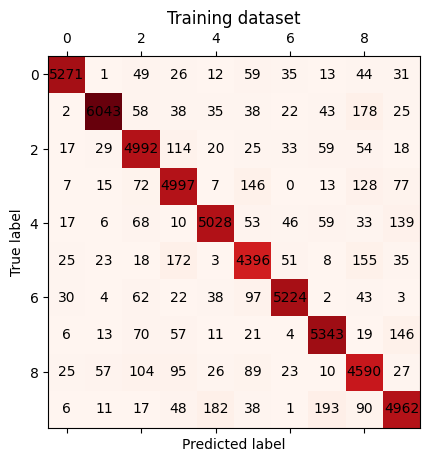

In [17]:
#Visual confusion matrix，task4.5
C = confusion_matrix(list(tf.argmax(train_pred,1)), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

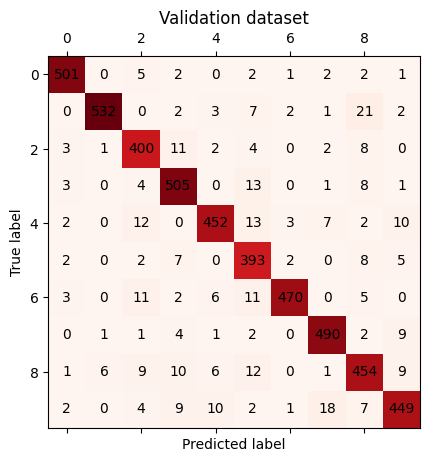

In [18]:
C = confusion_matrix(list(tf.argmax(valid_pred,1)), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

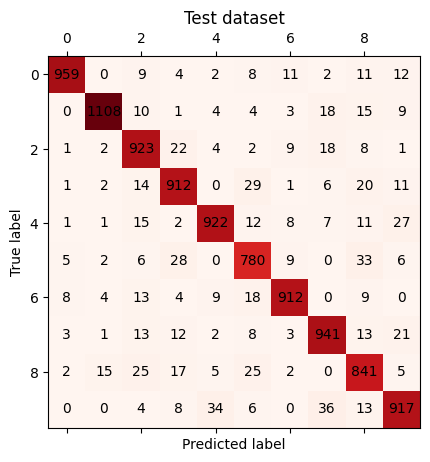

In [19]:
C = confusion_matrix(list(tf.argmax(test_pred,1)), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Task 4.6: Save the trained model to disk.

In [20]:
def save_model(filename, w): #Save training model
  m = np.shape(w)[0]
  f_w = open(filename, 'w')
  w_array = []
  for i in range(m):
      w_array.append(str(w[i, 0]))
  f_w.write('\t'.join(w_array))
  f_w.close()
save_model('SoftMax_Regression_weights',w)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10) #K=10
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:
#The total accuracy of the training set
train_pred = knn.predict(x_train)
acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

training dataset acc:0.9512


In [23]:
valid_pred = knn.predict(x_valid)
acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

Validation dataset acc:0.9528


In [24]:
test_pred = knn.predict(x_test)
acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

Testing dataset acc:0.9394


In [25]:
def class_accuracy(y_pred,y_true):  #Calculate the accuracy of each type
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

In [26]:
acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[0.9879763226045135, 0.9912931312479846, 0.9404718693284937, 0.9523212045169385, 0.9410667661320403, 0.9359129383313181, 0.9759146902004044, 0.9491554936444367, 0.9011998500187477, 0.929159802306425]
[0.9748549323017408, 0.9944444444444445, 0.9441964285714286, 0.9438405797101449, 0.95, 0.9564270152505446, 0.9853862212943633, 0.9521072796934866, 0.8800773694390716, 0.9465020576131687]
[0.9826530612244898, 0.9929515418502203, 0.9176356589147286, 0.9554455445544554, 0.9307535641547862, 0.92152466367713, 0.965553235908142, 0.9260700389105059, 0.8901437371663244, 0.9038652130822596]


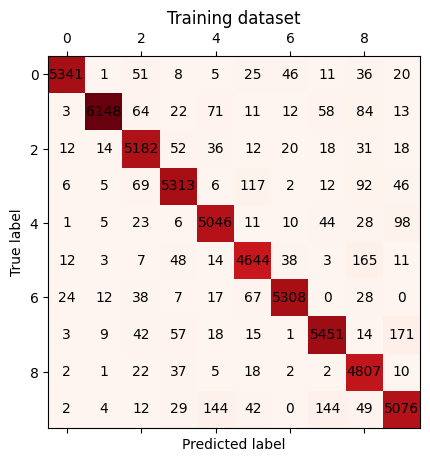

In [27]:
#Visual confusion matrix
C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

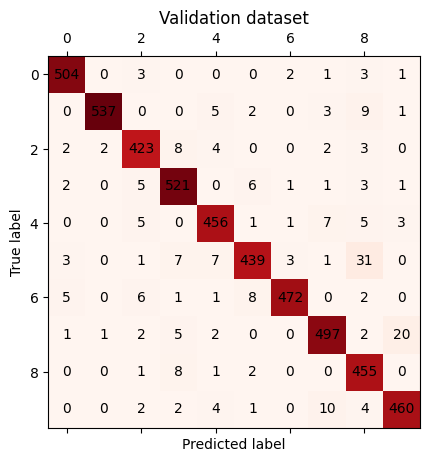

In [28]:
C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

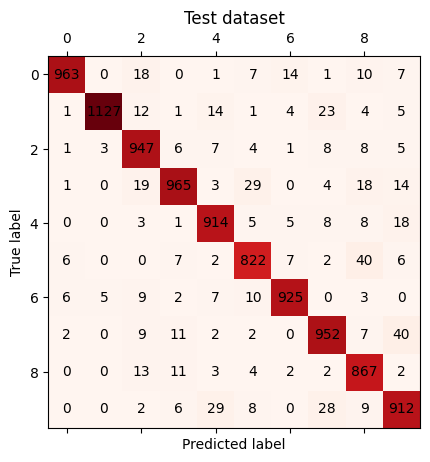

In [29]:
C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
!pip install joblib
import joblib
joblib.dump(knn,'./knn')  #KNN model is saved

['./knn']

In [31]:

# Sigmoid activator
class SigmoidActivator(object):
    def forward(self, weighted_input):
        return 1.0 / (1.0 + np.exp(-weighted_input))

    def backward(self, output):
        return np.multiply(output, (1 - output))  # Multiplication of corresponding elements

# softmax
class SoftmaxActivator(object):
    def forward(self, weighted_input):  # Calculate the output
        exps = np.exp(weighted_input - np.max(weighted_input))
        return exps / np.sum(exps)

    def backward(self, output):  # Calculate the derivative
        return 1

def one_hot(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

class FullConnectedLayer(object):
    def __init__(self, input_size, output_size, activator=None, learning_rate=None):
        self.input_size = input_size
        self.output_size = output_size
        self.activator = activator

        self.W = np.random.randn(output_size,input_size)

        self.b = np.random.randn(output_size,1)

        self.learning_rate = learning_rate

        self.output = np.zeros((output_size, 1))

    def forward(self, input_array):
        self.input = input_array
        self.output = self.activator.forward(np.dot(self.W, input_array) + self.b)
        return self.output

    def backward(self, delta_array):
        self.delta = np.multiply(self.activator.backward(self.output), delta_array)
        self.W_grad = np.dot(self.delta, self.input.T)
        self.b_grad = self.delta

    # Use gradient descent algorithm to update weight
    def update(self):
        self.W -= self.learning_rate * self.W_grad
        self.b -= self.learning_rate * self.b_grad

class Network(object):
    # Defining the network structure
    def __init__(self,input=784,output=10,Activateor=SigmoidActivator()):
        self.fl1 = FullConnectedLayer(input, 32, Activateor, 0.001)
        self.fl2 = FullConnectedLayer(32, 16, Activateor, 0.001)
        self.fl3 = FullConnectedLayer(16, output,SoftmaxActivator(), 0.001)


    def forward(self, input):   #forward propagation
        x = self.fl1.forward(input)
        x = self.fl2.forward(x)
        x = self.fl3.forward(x)
        return x

    def backward(self, labels):   #Back propagation
        delta = self.fl3.output - labels
        self.fl3.backward(delta)
        self.fl2.backward(np.dot(self.fl3.W.T, self.fl3.delta))
        self.fl1.backward(np.dot(self.fl2.W.T, self.fl2.delta))

        self.fl3.update()
        self.fl2.update()
        self.fl1.update()
net = Network(784,10)
start = time.time()
for i in range(1,21):
  train_pred = []
  valid_pred = []
  loss = 0
  right = 0
  right2 = 0
  for x,y in list(zip(x_train,y_train)):
    x = x.reshape(784,1)
    pretict = net.forward(x)
    net.backward(one_hot(y))
    loss+=1-max(pretict)
    train_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right += 1
  for x,y in list(zip(x_valid,y_valid)):
    x = x.reshape(784,1)
    pretict = net.forward(x)
    valid_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right2 += 1
  print("epoch:{} Train_Acc:{} Loss:{}".format(i,right/len(y_train),loss/len(y_train)))  #Number of training rounds, accuracy of training set, loss
  print("Valid_Acc:{}".format(right2/len(y_valid)))
end = time.time()
print("Training time:{}".format(end-start))

<ipython-input-31-ce95a952df7a>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-weighted_input))


epoch:1 Train_Acc:0.35414545454545454 Loss:[0.6302652]
Valid_Acc:0.509
epoch:2 Train_Acc:0.5583818181818182 Loss:[0.52595969]
Valid_Acc:0.6236
epoch:3 Train_Acc:0.6439272727272727 Loss:[0.44152889]
Valid_Acc:0.6854
epoch:4 Train_Acc:0.691509090909091 Loss:[0.38202024]
Valid_Acc:0.727
epoch:5 Train_Acc:0.7235272727272727 Loss:[0.33948199]
Valid_Acc:0.7534
epoch:6 Train_Acc:0.7462181818181818 Loss:[0.30754006]
Valid_Acc:0.7708
epoch:7 Train_Acc:0.7649272727272727 Loss:[0.28272759]
Valid_Acc:0.785
epoch:8 Train_Acc:0.7794727272727273 Loss:[0.26291367]
Valid_Acc:0.797
epoch:9 Train_Acc:0.7909454545454545 Loss:[0.24686414]
Valid_Acc:0.8078
epoch:10 Train_Acc:0.8002545454545454 Loss:[0.23379675]
Valid_Acc:0.816
epoch:11 Train_Acc:0.8088363636363637 Loss:[0.22271895]
Valid_Acc:0.8248
epoch:12 Train_Acc:0.8166727272727273 Loss:[0.21307304]
Valid_Acc:0.8304
epoch:13 Train_Acc:0.8222 Loss:[0.20474815]
Valid_Acc:0.8364
epoch:14 Train_Acc:0.8277454545454546 Loss:[0.19750496]
Valid_Acc:0.841
epoch:

In [32]:
right = 0
test_pred = []
for x,y in list(zip(x_test,y_test)):
  x = x.reshape(784,1)
  pretict = net.forward(x)
  test_pred.append(np.argmax(pretict))
  if np.argmax(pretict) == y:
    right += 1
print("Test_Acc:{}".format(right/len(y_test)))  # Accuracy of test set

Test_Acc:0.8474


In [33]:
def class_accuracy(trains,labels):
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in labels:
    classnum[label] = classnum[label]+1
  for x,y in list(zip(trains,labels)):
    x = x.reshape(784,1)
    pretict = net.forward(x)
    if np.argmax(pretict) == y:
      class_acc[y] +=1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

In [34]:
#Accuracy in each category
acc = class_accuracy(x_train,y_train)
print(acc)
acc = class_accuracy(x_valid,y_valid)
print(acc)
acc = class_accuracy(x_test,y_test)

<ipython-input-31-ce95a952df7a>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-weighted_input))


[0.9313725490196079, 0.9511447920025798, 0.8330308529945554, 0.8211148951424987, 0.8550913838120104, 0.7726723095525998, 0.9078874793160507, 0.8612223576527948, 0.7866516685414323, 0.818597840014644]
[0.9284332688588007, 0.9518518518518518, 0.8258928571428571, 0.8242753623188406, 0.8833333333333333, 0.7538126361655774, 0.9457202505219207, 0.8735632183908046, 0.7872340425531915, 0.8415637860082305]


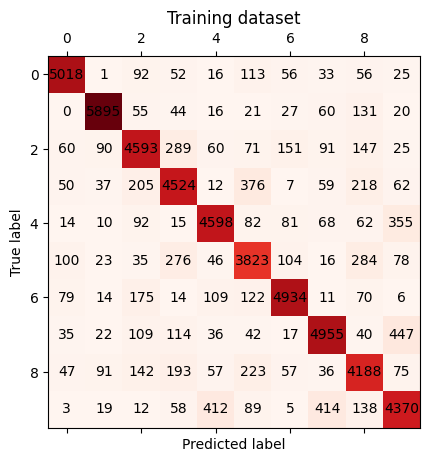

In [35]:
C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

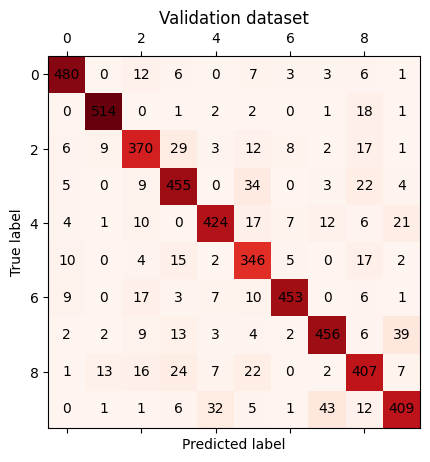

In [36]:
C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

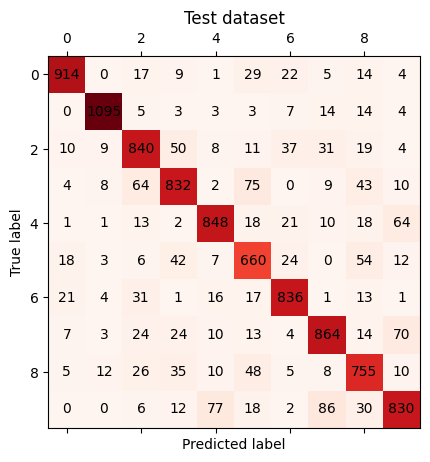

In [37]:
C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
# Support Vector Machine
from sklearn import svm
predictor = svm.SVC(gamma='scale', C=1.0,decision_function_shape='ovr', kernel='rbf')
start = time.time()
predictor.fit(x_train, y_train)
end = time.time()
print("Training time:{}".format(end-start))

Training time:342.00866746902466


In [39]:
#Prediction results of training set, validation set and test set
train_pred = predictor.predict(x_train)
valid_pred = predictor.predict(x_valid)
test_pred = predictor.predict(x_test)

In [40]:
#The total accuracy of the training set
acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

training dataset acc:0.9860363636363636


In [41]:
acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

Validation dataset acc:0.9678


In [42]:
acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

Testing dataset acc:0.9656


In [43]:
def class_accuracy(y_pred,y_true):
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc
acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[0.9946355900850906, 0.9920993227990971, 0.9896551724137931, 0.9781322817709267, 0.9865721745617307, 0.985086658605401, 0.9928295642581357, 0.9853734981716873, 0.9821897262842145, 0.9730917078528282]
[0.9709864603481625, 0.9907407407407407, 0.9665178571428571, 0.9619565217391305, 0.975, 0.954248366013072, 0.9749478079331941, 0.975095785440613, 0.9477756286266924, 0.9588477366255144]
[0.9857142857142858, 0.9920704845814978, 0.9631782945736435, 0.9712871287128713, 0.960285132382892, 0.9607623318385651, 0.9686847599164927, 0.9630350194552529, 0.9517453798767967, 0.9355797819623389]


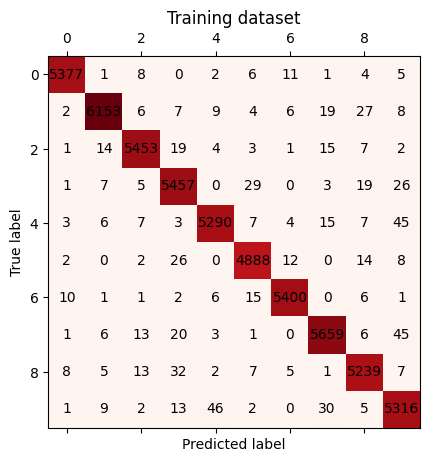

In [44]:
C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

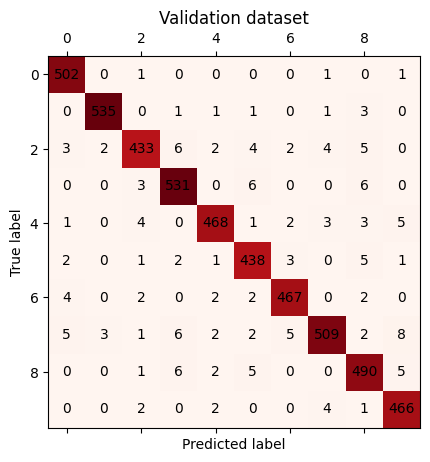

In [45]:
C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

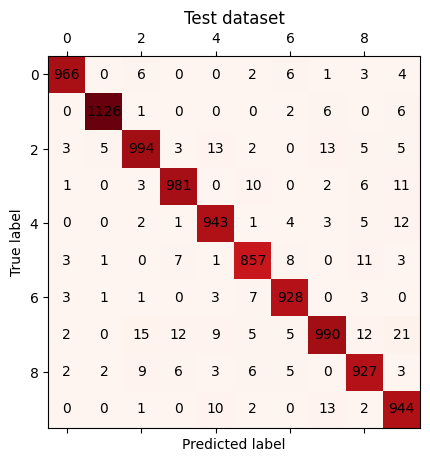

In [46]:
C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
#save model
joblib.dump(predictor,'./SVM.pkl')

['./SVM.pkl']

In [49]:
# Decision Tree
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=21, min_samples_split=3,random_state=40,)
start = time.time()
classifier.fit(x_train, y_train)
print("Training time:{}".format(end-start))


Training time:-1119.1485011577606


In [50]:
# Prediction results of training set, validation set and test set
train_pred = classifier.predict(x_train)
valid_pred = classifier.predict(x_valid)
test_pred = classifier.predict(x_test)

acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

training dataset acc:0.9937090909090909
Validation dataset acc:0.827
Testing dataset acc:0.874


In [51]:
def class_accuracy(y_pred,y_true):
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[1.0, 0.9995162850693324, 0.9972776769509982, 0.995698153791002, 0.9958970533383066, 0.9915356711003628, 0.9926457069314212, 0.9935573741946718, 0.9833145856767904, 0.9864543291231924]
[0.9013539651837524, 0.975925925925926, 0.8549107142857143, 0.8876811594202898, 0.68125, 0.6579520697167756, 0.9018789144050104, 0.9233716475095786, 0.7911025145067698, 0.6522633744855967]
[0.9438775510204082, 0.9779735682819384, 0.8401162790697675, 0.8564356435643564, 0.8594704684317719, 0.8172645739910314, 0.9081419624217119, 0.8784046692607004, 0.8028747433264887, 0.8374628344895937]


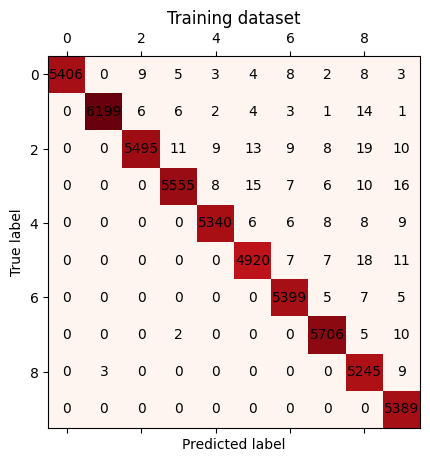

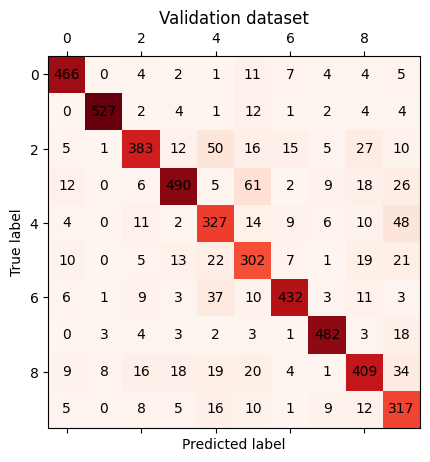

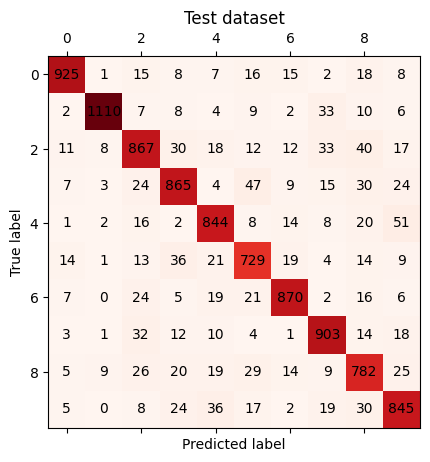

In [52]:
C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
#save
joblib.dump(classifier,'./Decision_Tree.pkl')

['./Decision_Tree.pkl']

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
start = time.time()
classifier.fit(x_train,y_train)
end = time.time()
print("Training time:{}".format(end-start))

Training time:36.52459359169006


In [55]:
train_pred = classifier.predict(x_train)
valid_pred = classifier.predict(x_valid)
test_pred = classifier.predict(x_test)

acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

training dataset acc:1.0
Validation dataset acc:0.835
Testing dataset acc:0.965


In [56]:
def class_accuracy(y_pred,y_true):
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9787234042553191, 0.15185185185185185, 0.9620535714285714, 0.9528985507246377, 0.9541666666666667, 0.8758169934640523, 0.964509394572025, 0.7950191570881227, 0.9535783365570599, 0.823045267489712]
[0.9857142857142858, 0.986784140969163, 0.9593023255813954, 0.9663366336633663, 0.9694501018329938, 0.9618834080717489, 0.975991649269311, 0.9484435797665369, 0.9486652977412731, 0.9454905847373637]


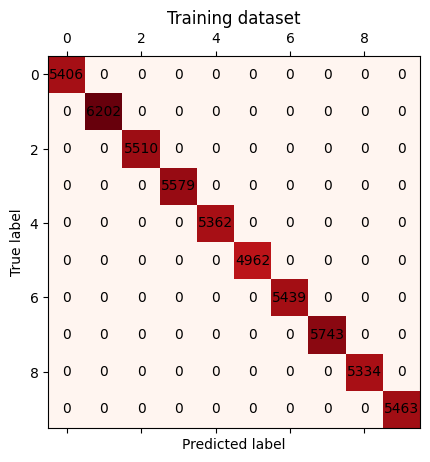

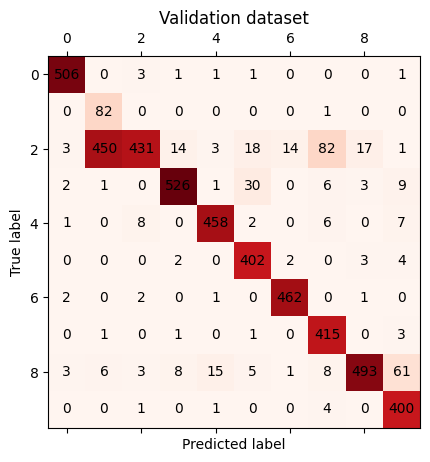

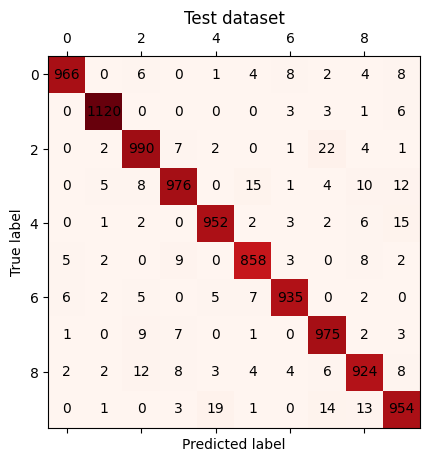

In [57]:
C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [58]:
#save
joblib.dump(classifier,'./Random_Forest.pkl')

['./Random_Forest.pkl']

In [59]:
# Convolutional Neural Network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x_train.reshape(-1,28,28), y_train, epochs=5)
end = time.time()
print("Training time:{}".format(end-start))

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2466 - accuracy: 0.9308
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9684
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0775 - accuracy: 0.9778
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0550 - accuracy: 0.9832
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9868
Training time:29.00832486152649


In [60]:
train_pred=np.argmax(model.predict(x_train.reshape(-1,28,28)),axis=1)
valid_pred=np.argmax(model.predict(x_valid.reshape(-1,28,28)),axis=1)
test_pred=np.argmax(model.predict(x_test.reshape(-1,28,28)),axis=1)

acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

313/313 [==============================] - 1s 2ms/step
training dataset acc:0.9899818181818182
Validation dataset acc:0.9686
Testing dataset acc:0.971


In [61]:
def class_accuracy(y_pred,y_true):
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)
print(acc)
acc = class_accuracy(valid_pred,y_valid)
print(acc)
acc = class_accuracy(test_pred,y_test)
print(acc)

[0.9911209766925638, 0.9982263785875524, 0.9945553539019963, 0.9845850510844237, 0.9970160387914957, 0.9953647722692462, 0.9941165655451369, 0.9942538742817343, 0.973753280839895, 0.9758374519494784]
[0.9516441005802708, 0.9888888888888889, 0.9665178571428571, 0.967391304347826, 0.9854166666666667, 0.9803921568627451, 0.9791231732776617, 0.9827586206896551, 0.9245647969052224, 0.9609053497942387]
[0.9816326530612245, 0.9903083700440528, 0.9757751937984496, 0.9762376237623762, 0.9806517311608961, 0.9663677130044843, 0.9749478079331941, 0.9649805447470817, 0.9435318275154004, 0.9524281466798811]


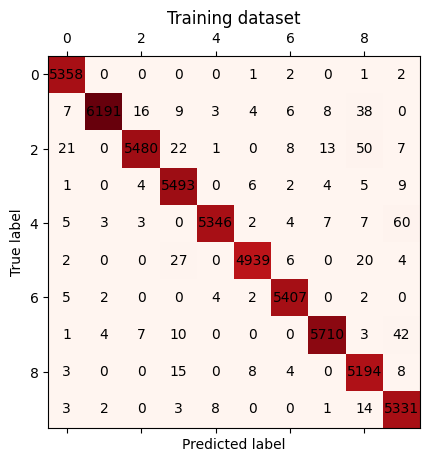

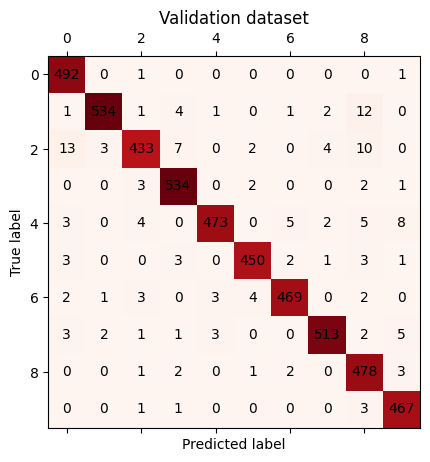

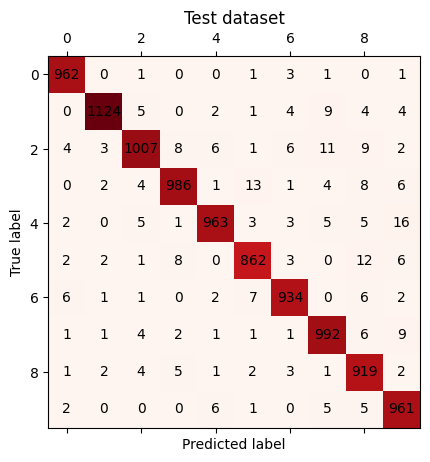

In [62]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
##Summary of classification Accuracy
nums = np.array([['9.2396s','93.03%','92.92%','92.40%'],['0s','95.12%','95.28%','93.34%'],['324s','85.48%','86.58%','84.86%'],['437s','98.60%','96.78%','96.56%'],['13.432s','99.37%','82.7%','87.4%'],['40.989s','100%','83.4%','96.58%'],['22.99s','98.29%','97.1%','96.96%']])
colu = ['Training_time','Training_dataset','Validation_dataset','Testing_dataset']
index = ['SoftMax Regression','KNearest neighbors','Deep Neural Networks','Support Vector Machine','Decision Tree','Random Forest','Convolutional Neural Network']
pd.DataFrame(data=nums,index = index,columns = colu)

,Training_time,Training_dataset,Validation_dataset,Testing_dataset
SoftMax Regression,9.2396s,93.03%,92.92%,92.40%
KNearest neighbors,0s,95.12%,95.28%,93.34%
Deep Neural Networks,324s,85.48%,86.58%,84.86%
Support Vector Machine,437s,98.60%,96.78%,96.56%
Decision Tree,13.432s,99.37%,82.7%,87.4%
Random Forest,40.989s,100%,83.4%,96.58%
Convolutional Neural Network,22.99s,98.29%,97.1%,96.96%


Part II (15 points):  Deploy the machine learning models on Gradio or huggingface
Following our lab: Week 1 Lab -Part III: Build and Host Machine Learning Demos with Gradio, design your own web applications. Your web application can include any functionalities that relate to this assignment, such as image classification, image clustering, image dimension reductions, etc.


In [64]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [65]:
#Image classification
import gradio as gr
import cv2

def Image_classification(image):
    image = preprocessing.scale(image)
    image = image.reshape(-1,28,28)
    output = np.argmax(model.predict(image,axis=1))
    return output

interface = gr.Interface(fn=Image_classification, inputs="image", outputs=gr.outputs.Label(num_top_classes=1))
interface.launch()

<ipython-input-65-58d40054558f>:11: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  interface = gr.Interface(fn=Image_classification, inputs="image", outputs=gr.outputs.Label(num_top_classes=1))
<ipython-input-65-58d40054558f>:11: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  interface = gr.Interface(fn=Image_classification, inputs="image", outputs=gr.outputs.Label(num_top_classes=1))


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [66]:
#Image gray function
import cv2

def to_black(image):
    output = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return output

interface = gr.Interface(fn=to_black, inputs="image", outputs="image")
interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>